<a href="https://colab.research.google.com/github/alinuman915/noman/blob/main/BPA_BPS_Toxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

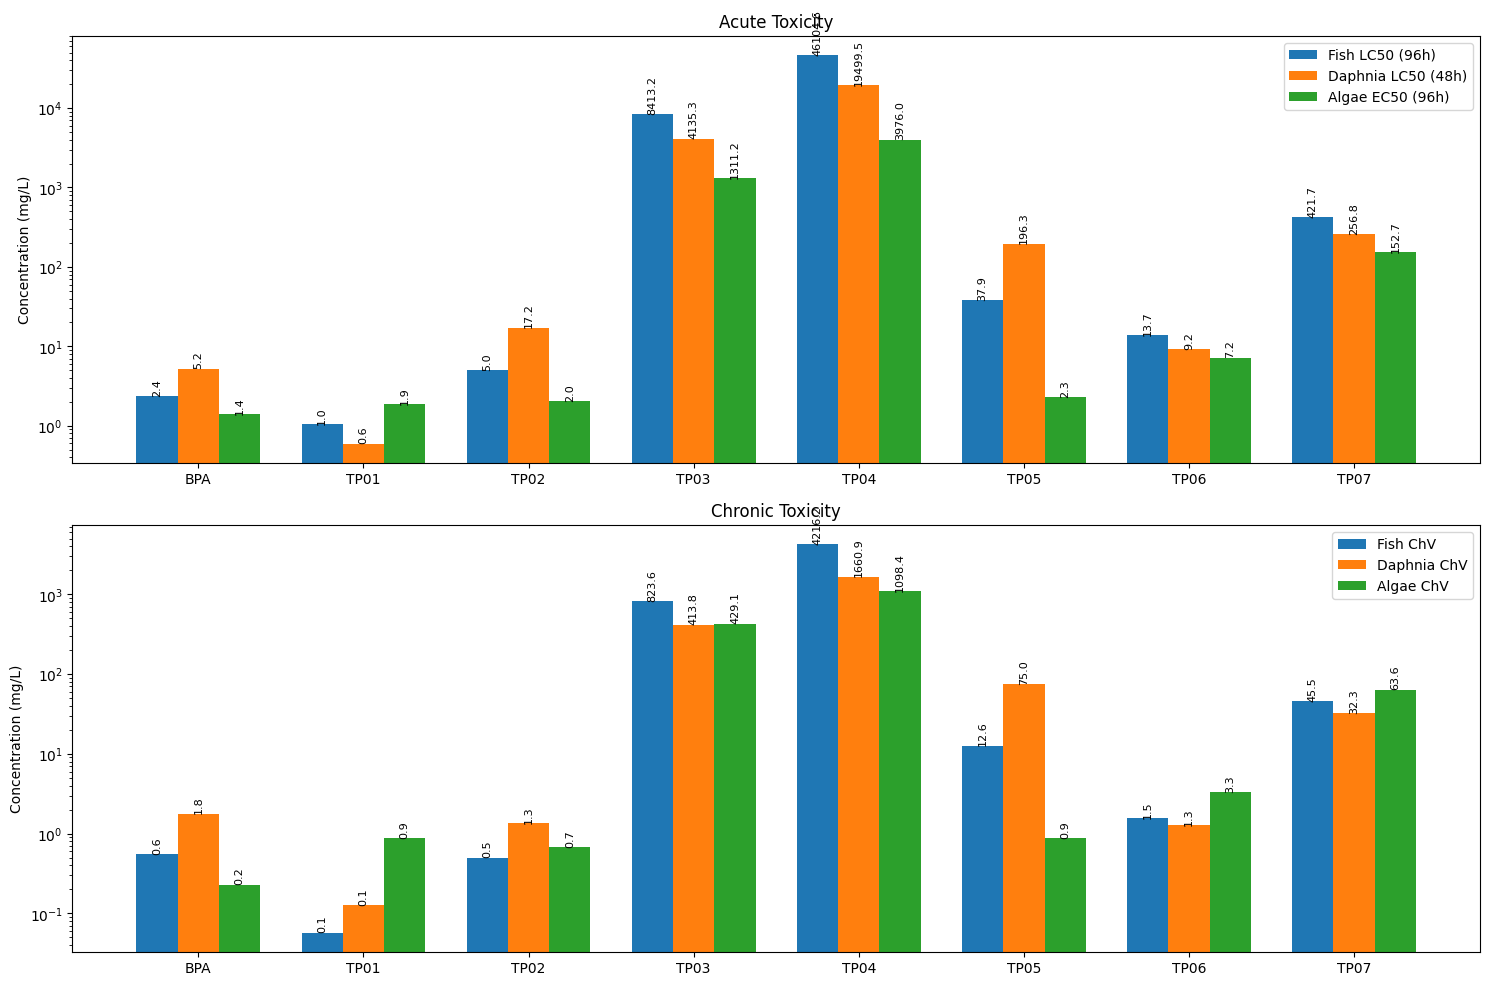

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
data = {
    'Compound': ['BPA', 'TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07'],
    'Fish_LC50': [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    'Daphnia_LC50': [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    'Algae_EC50': [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    'Fish_ChV': [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    'Daphnia_ChV': [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    'Algae_ChV': [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}

df = pd.DataFrame(data)

# Set up the figure
plt.figure(figsize=(15, 10))

# Acute toxicity subplot
plt.subplot(2, 1, 1)
x = np.arange(len(df['Compound']))  # the label locations
width = 0.25  # the width of the bars

bars1 = plt.bar(x - width, df['Fish_LC50'], width, label='Fish LC50 (96h)')
bars2 = plt.bar(x, df['Daphnia_LC50'], width, label='Daphnia LC50 (48h)')
bars3 = plt.bar(x + width, df['Algae_EC50'], width, label='Algae EC50 (96h)')

plt.ylabel('Concentration (mg/L)')
plt.title('Acute Toxicity')
plt.xticks(x, df['Compound'])
plt.yscale('log')  # Log scale due to wide range of values
plt.legend()

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}',
                 ha='center', va='bottom', rotation=90, fontsize=8)

# Chronic toxicity subplot
plt.subplot(2, 1, 2)
bars4 = plt.bar(x - width, df['Fish_ChV'], width, label='Fish ChV')
bars5 = plt.bar(x, df['Daphnia_ChV'], width, label='Daphnia ChV')
bars6 = plt.bar(x + width, df['Algae_ChV'], width, label='Algae ChV')

plt.ylabel('Concentration (mg/L)')
plt.title('Chronic Toxicity')
plt.xticks(x, df['Compound'])
plt.yscale('log')  # Log scale due to wide range of values
plt.legend()

# Add value labels
for bars in [bars4, bars5, bars6]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}',
                 ha='center', va='bottom', rotation=90, fontsize=8)

plt.tight_layout()
plt.show()






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.facecolor'] = 'white'

# Data
data = {
    'Compound': ['BPA', 'TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07'],
    'Fish_LC50': [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    'Daphnia_LC50': [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    'Algae_EC50': [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    'Fish_ChV': [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    'Daphnia_ChV': [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    'Algae_ChV': [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}

df = pd.DataFrame(data)

# Melt the dataframe for easier plotting
acute_df = df.melt(id_vars=['Compound'],
                  value_vars=['Fish_LC50', 'Daphnia_LC50', 'Algae_EC50'],
                  var_name='Test', value_name='Value')
acute_df['Toxicity'] = 'Acute'

chronic_df = df.melt(id_vars=['Compound'],
                    value_vars=['Fish_ChV', 'Daphnia_ChV', 'Algae_ChV'],
                    var_name='Test', value_name='Value')
chronic_df['Toxicity'] = 'Chronic'

combined_df = pd.concat([acute_df, chronic_df])

# Clean up test names
combined_df['Test'] = combined_df['Test'].replace({
    'Fish_LC50': 'Fish',
    'Daphnia_LC50': 'Daphnia',
    'Algae_EC50': 'Algae',
    'Fish_ChV': 'Fish',
    'Daphnia_ChV': 'Daphnia',
    'Algae_ChV': 'Algae'
})

# Create figure
plt.figure(figsize=(14, 8))

# Create a grid
g = sns.FacetGrid(combined_df, col='Toxicity', height=6, aspect=1.2, sharey=False)
g.map_dataframe(sns.pointplot, x='Compound', y='Value', hue='Test',
                palette='Set2', markers=['o', 's', 'D'], linestyles=['-', '--', ':'],
                scale=1.2, errwidth=0)

# Set log scale and proper labels
for ax in g.axes.flat:
    ax.set_yscale('log')
    ax.set_ylabel('Concentration (mg/L)')
    ax.set_xlabel('Compound')
    ax.grid(True, which="both", ls="-", alpha=0.3)
    ax.legend(title='Organism')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Acute vs Chronic Toxicity Across Compounds', fontsize=16)

# Add value annotations
for ax in g.axes.flat:
    for p in ax.collections:
        for x, y in zip(p.get_offsets()[:,0], p.get_offsets()[:,1]):
            if y > 0:  # Only label positive values
                ax.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=9)

plt.show()





import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap

# ========== DATA PREP ==========
data = {
    'Compound': ['BPA', 'TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07'],
    'Fish_Acute': [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    'Daphnia_Acute': [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    'Algae_Acute': [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    'Fish_Chronic': [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    'Daphnia_Chronic': [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    'Algae_Chronic': [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}

df = pd.DataFrame(data)
melted_df = pd.melt(df, id_vars=['Compound'], var_name='Metric', value_name='Value')
melted_df[['Organism', 'Toxicity']] = melted_df['Metric'].str.split('_', expand=True)

# ========== PLOT DESIGN ==========
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid", {'grid.linestyle': ':', 'axes.edgecolor': '0.3'})

# Create custom colormap
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Fish, Daphnia, Algae
custom_cmap = ListedColormap(colors)

# Create subplots
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)  # Acute
ax2 = plt.subplot2grid((2, 2), (1, 0))             # Chronic Fish
ax3 = plt.subplot2grid((2, 2), (1, 1))             # Chronic Daphnia/Algae

# ========== ACUTE TOXICITY PLOT ==========
acute_data = melted_df[melted_df['Toxicity'] == 'Acute']
sns.lineplot(data=acute_data, x='Compound', y='Value', hue='Organism',
             style='Organism', markers=True, dashes=False, palette=colors,
             markersize=10, linewidth=2.5, ax=ax1)

ax1.set_yscale('log')
ax1.set_title('Acute Toxicity (LC50/EC50)', pad=20, fontweight='bold')
ax1.set_ylabel('Concentration (mg/L)', labelpad=10)
ax1.legend(frameon=True, shadow=True)
ax1.grid(True, which="both", ls=":", alpha=0.5)

# Add value annotations
for org in ['Fish', 'Daphnia', 'Algae']:
    subset = acute_data[acute_data['Organism'] == org]
    for _, row in subset.iterrows():
        ax1.text(row['Compound'], row['Value'], f"{row['Value']:.1f}",
                ha='center', va='bottom' if org == 'Algae' else 'top',
                fontsize=9, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# ========== CHRONIC TOXICITY PLOTS ==========
# Fish Chronic
fish_chronic = melted_df[(melted_df['Organism'] == 'Fish') & (melted_df['Toxicity'] == 'Chronic')]
sns.scatterplot(data=fish_chronic, x='Compound', y='Value', color=colors[0],
                s=150, ax=ax2, edgecolor='w', linewidth=1, zorder=3)
ax2.plot(fish_chronic['Compound'], fish_chronic['Value'], color=colors[0],
         linestyle='--', alpha=0.6)

ax2.set_yscale('log')
ax2.set_title('Chronic Toxicity - Fish (ChV)', fontweight='bold')
ax2.set_ylabel('Concentration (mg/L)', labelpad=10)

# Daphnia & Algae Chronic
chronic_others = melted_df[(melted_df['Organism'] != 'Fish') & (melted_df['Toxicity'] == 'Chronic')]
sns.scatterplot(data=chronic_others, x='Compound', y='Value', hue='Organism',
                palette=colors[1:], style='Organism', s=150, ax=ax3,
                edgecolor='w', linewidth=1, zorder=3)

for org in ['Daphnia', 'Algae']:
    subset = chronic_others[chronic_others['Organism'] == org]
    ax3.plot(subset['Compound'], subset['Value'], color=colors[1 if org == 'Daphnia' else 2],
             linestyle='--' if org == 'Daphnia' else ':', alpha=0.6)

ax3.set_yscale('log')
ax3.set_title('Chronic Toxicity - Daphnia & Algae (ChV)', fontweight='bold')
ax3.legend(frameon=True, shadow=True)

# ========== FINAL TOUCHES ==========
plt.suptitle('Comparative Toxicity Analysis', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()

# Add divider lines
for ax in [ax2, ax3]:
    ax.axhline(y=1, color='red', linestyle='--', alpha=0.3, zorder=0)  # Reference line at 1 mg/L

plt.show()



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap

# Set style
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.facecolor'] = 'white'

# Data
data = {
    'Compound': ['BPA', 'TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07'],
    'Fish_LC50': [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    'Daphnia_LC50': [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    'Algae_EC50': [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    'Fish_ChV': [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    'Daphnia_ChV': [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    'Algae_ChV': [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}

df = pd.DataFrame(data)

# Melt the dataframe for easier plotting
acute_df = df.melt(id_vars=['Compound'],
                  value_vars=['Fish_LC50', 'Daphnia_LC50', 'Algae_EC50'],
                  var_name='Test', value_name='Value')
acute_df['Toxicity'] = 'Acute'

chronic_df = df.melt(id_vars=['Compound'],
                    value_vars=['Fish_ChV', 'Daphnia_ChV', 'Algae_ChV'],
                    var_name='Test', value_name='Value')
chronic_df['Toxicity'] = 'Chronic'

combined_df = pd.concat([acute_df, chronic_df])

# Clean up test names
combined_df['Test'] = combined_df['Test'].replace({
    'Fish_LC50': 'Fish',
    'Daphnia_LC50': 'Daphnia',
    'Algae_EC50': 'Algae',
    'Fish_ChV': 'Fish',
    'Daphnia_ChV': 'Daphnia',
    'Algae_ChV': 'Algae'
})

# Create figure
plt.figure(figsize=(14, 8))

# Create a grid
g = sns.FacetGrid(combined_df, col='Toxicity', height=6, aspect=1.2, sharey=False)
g.map_dataframe(sns.pointplot, x='Compound', y='Value', hue='Test',
                palette='Set2', markers=['o', 's', 'D'], linestyles=['-', '--', ':'],
                scale=1.2, errwidth=0)

# Set log scale and proper labels
for ax in g.axes.flat:
    ax.set_yscale('log')
    ax.set_ylabel('Concentration (mg/L)')
    ax.set_xlabel('Compound')
    ax.grid(True, which="both", ls="-", alpha=0.3)
    ax.legend(title='Organism')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Acute vs Chronic Toxicity Across Compounds', fontsize=16)

# Add value annotations
for ax in g.axes.flat:
    for p in ax.collections:
        for x, y in zip(p.get_offsets()[:,0], p.get_offsets()[:,1]):
            if y > 0:  # Only label positive values
                ax.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=9)

plt.show()





import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap

# ========== DATA PREP ==========
data = {
    'Compound': ['BPA', 'TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07'],
    'Fish_Acute': [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    'Daphnia_Acute': [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    'Algae_Acute': [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    'Fish_Chronic': [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    'Daphnia_Chronic': [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    'Algae_Chronic': [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}

df = pd.DataFrame(data)
melted_df = pd.melt(df, id_vars=['Compound'], var_name='Metric', value_name='Value')
melted_df[['Organism', 'Toxicity']] = melted_df['Metric'].str.split('_', expand=True)

# ========== PLOT DESIGN ==========
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid", {'grid.linestyle': ':', 'axes.edgecolor': '0.3'})

# Create custom colormap
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Fish, Daphnia, Algae
custom_cmap = ListedColormap(colors)

# Create subplots
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)  # Acute
ax2 = plt.subplot2grid((2, 2), (1, 0))             # Chronic Fish
ax3 = plt.subplot2grid((2, 2), (1, 1))             # Chronic Daphnia/Algae

# ========== ACUTE TOXICITY PLOT ==========
acute_data = melted_df[melted_df['Toxicity'] == 'Acute']
sns.lineplot(data=acute_data, x='Compound', y='Value', hue='Organism',
             style='Organism', markers=True, dashes=False, palette=colors,
             markersize=10, linewidth=2.5, ax=ax1)

ax1.set_yscale('log')
ax1.set_title('Acute Toxicity (LC50/EC50)', pad=20, fontweight='bold')
ax1.set_ylabel('Concentration (mg/L)', labelpad=10)
ax1.legend(frameon=True, shadow=True)
ax1.grid(True, which="both", ls=":", alpha=0.5)

# Add value annotations
for org in ['Fish', 'Daphnia', 'Algae']:
    subset = acute_data[acute_data['Organism'] == org]
    for _, row in subset.iterrows():
        ax1.text(row['Compound'], row['Value'], f"{row['Value']:.1f}",
                ha='center', va='bottom' if org == 'Algae' else 'top',
                fontsize=9, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# ========== CHRONIC TOXICITY PLOTS ==========
# Fish Chronic
fish_chronic = melted_df[(melted_df['Organism'] == 'Fish') & (melted_df['Toxicity'] == 'Chronic')]
sns.scatterplot(data=fish_chronic, x='Compound', y='Value', color=colors[0],
                s=150, ax=ax2, edgecolor='w', linewidth=1, zorder=3)
ax2.plot(fish_chronic['Compound'], fish_chronic['Value'], color=colors[0],
         linestyle='--', alpha=0.6)

ax2.set_yscale('log')
ax2.set_title('Chronic Toxicity - Fish (ChV)', fontweight='bold')
ax2.set_ylabel('Concentration (mg/L)', labelpad=10)

# Daphnia & Algae Chronic
chronic_others = melted_df[(melted_df['Organism'] != 'Fish') & (melted_df['Toxicity'] == 'Chronic')]
sns.scatterplot(data=chronic_others, x='Compound', y='Value', hue='Organism',
                palette=colors[1:], style='Organism', s=150, ax=ax3,
                edgecolor='w', linewidth=1, zorder=3)

for org in ['Daphnia', 'Algae']:
    subset = chronic_others[chronic_others['Organism'] == org]
    ax3.plot(subset['Compound'], subset['Value'], color=colors[1 if org == 'Daphnia' else 2],
             linestyle='--' if org == 'Daphnia' else ':', alpha=0.6)

ax3.set_yscale('log')
ax3.set_title('Chronic Toxicity - Daphnia & Algae (ChV)', fontweight='bold')
ax3.legend(frameon=True, shadow=True)

# ========== FINAL TOUCHES ==========
plt.suptitle('Comparative Toxicity Analysis', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()

# Add divider lines
for ax in [ax2, ax3]:
    ax.axhline(y=1, color='red', linestyle='--', alpha=0.3, zorder=0)  # Reference line at 1 mg/L

plt.show()





# Spider Web Plot



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

# Data Prep
toxicity_data = {
    'Compound': ['BPA', 'TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07'],
    'Fish_Acute': [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    'Daphnia_Acute': [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    'Algae_Acute': [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    'Fish_Chronic': [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    'Daphnia_Chronic': [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    'Algae_Chronic': [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}

# Normalize data (0-1 scale for radar chart)
def normalize(series):
    return (np.log10(series) - np.log10(series.min())) / (np.log10(series.max()) - np.log10(series.min()))

df = pd.DataFrame(toxicity_data)
for col in df.columns[1:]:
    df[col] = normalize(df[col])

# Set up radar chart
categories = ['Fish', 'Daphnia', 'Algae']
N = len(categories)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Plot design
plt.figure(figsize=(12, 12))
sns.set_style("white")
plt.rcParams['font.family'] = 'Arial'

# Create subplots
ax1 = plt.subplot(121, polar=True)  # Acute
ax2 = plt.subplot(122, polar=True)  # Chronic

# Color scheme
acute_color = '#1f77b4'
chronic_color = '#d62728'
fill_alpha = 0.2

# Plot acute toxicity
for idx, row in df.iterrows():
    acute_values = row[['Fish_Acute', 'Daphnia_Acute', 'Algae_Acute']].values.tolist()
    acute_values += acute_values[:1]
    ax1.plot(angles, acute_values, marker='o', markersize=8, linewidth=2,
             label=row['Compound'], color=plt.cm.tab20(idx))
    ax1.fill(angles, acute_values, alpha=fill_alpha, color=plt.cm.tab20(idx))

# Plot chronic toxicity
for idx, row in df.iterrows():
    chronic_values = row[['Fish_Chronic', 'Daphnia_Chronic', 'Algae_Chronic']].values.tolist()
    chronic_values += chronic_values[:1]
    ax2.plot(angles, chronic_values, marker='s', markersize=8, linewidth=2,
             label=row['Compound'], color=plt.cm.tab20(idx))
    ax2.fill(angles, chronic_values, alpha=fill_alpha, color=plt.cm.tab20(idx)) # Corrected alpha

# Configure acute plot
ax1.set_theta_offset(np.pi/2)
ax1.set_theta_direction(-1)
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories, fontsize=12)
ax1.set_title('Acute Toxicity (LC50/EC50)', pad=20, fontsize=14, fontweight='bold')
ax1.set_rlabel_position(30)
ax1.set_ylim(0, 1)

# Configure chronic plot
ax2.set_theta_offset(np.pi/2)
ax2.set_theta_direction(-1)
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories, fontsize=12)
ax2.set_title('Chronic Toxicity (ChV)', pad=20, fontsize=14, fontweight='bold')
ax2.set_ylim(0, 1)

# Legend
handles = [Patch(facecolor=plt.cm.tab20(i), label=df['Compound'][i]) for i in range(len(df))]
plt.legend(handles=handles, bbox_to_anchor=(1.3, 1), title='Compounds', frameon=False)

plt.suptitle('Comparative Toxicological Profiles', y=1.05, fontsize=16, fontweight='bold')
plt.tight_layout()

# Add explanatory note
plt.figtext(0.5, 0.02,
            "Note: Values are log-normalized (0=most toxic, 1=least toxic within each metric)",
            ha="center", fontsize=10, style='italic')

plt.show()




# Toxicity Ladder



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Data
tox_data = {
    'Compound': ['BPA', 'TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07'],
    'Fish_A': [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    'Daphnia_A': [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    'Algae_A': [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    'Fish_C': [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    'Daphnia_C': [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    'Algae_C': [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}
df = pd.DataFrame(tox_data)

# Set up plot
plt.figure(figsize=(14, 8))
gs = GridSpec(1, 2, width_ratios=[1, 1])
sns.set_style("whitegrid", {'grid.color': '.9', 'grid.linestyle': ':'})
plt.rcParams['font.family'] = 'Arial'

# Colormap
cmap = plt.cm.get_cmap('viridis', len(df['Compound']))
colors = [cmap(i) for i in np.linspace(0, 1, len(df['Compound']))]

# Acute Plot (Left)
ax1 = plt.subplot(gs[0])
for i, row in df.iterrows():
    ax1.scatter([1, 2, 3], [row['Fish_A'], row['Daphnia_A'], row['Algae_A']],
                color=colors[i], s=150, edgecolor='w', linewidth=1, zorder=3,
                label=row['Compound'])
    ax1.plot([1, 2, 3], [row['Fish_A'], row['Daphnia_A'], row['Algae_A']],
             color=colors[i], alpha=0.5, linestyle='--')

ax1.set_yscale('log')
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(['Fish\nLC50', 'Daphnia\nLC50', 'Algae\nEC50'], fontsize=12)
ax1.set_ylabel('Concentration (mg/L)', fontweight='bold')
ax1.set_title('ACUTE TOXICITY', fontsize=14, pad=20, fontweight='bold')
ax1.grid(True, which="both", axis='y', ls=":", alpha=0.7)

# Chronic Plot (Right)
ax2 = plt.subplot(gs[1], sharey=ax1)
for i, row in df.iterrows():
    ax2.scatter([1, 2, 3], [row['Fish_C'], row['Daphnia_C'], row['Algae_C']],
                color=colors[i], s=150, edgecolor='w', linewidth=1, zorder=3,
                marker='s')  # Different marker for chronic
    ax2.plot([1, 2, 3], [row['Fish_C'], row['Daphnia_C'], row['Algae_C']],
             color=colors[i], alpha=0.5, linestyle=':')  # Different line style

ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['Fish\nChV', 'Daphnia\nChV', 'Algae\nChV'], fontsize=12)
ax2.set_title('CHRONIC TOXICITY', fontsize=14, pad=20, fontweight='bold')
ax2.grid(True, which="both", axis='y', ls=":", alpha=0.7)

# Legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i],
            markersize=10, label=df['Compound'][i]) for i in range(len(df))]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), title='Compounds')

# Add connecting lines between plots
for i in range(len(df)):
    y_acute = df.loc[i, 'Fish_A']
    y_chronic = df.loc[i, 'Fish_C']
    # Corrected coordinates for connecting lines
    plt.plot([0.47, 0.53], [y_acute, y_chronic], color=colors[i], alpha=0.3,
             transform=plt.gcf().transFigure, clip_on=False)


# Add ratio annotations
for i in range(len(df)):
    ratio = df.loc[i, 'Fish_A'] / df.loc[i, 'Fish_C']
    ax1.text(1, df.loc[i, 'Fish_A'], f"{ratio:.1f}x", ha='right', va='center',
             bbox=dict(facecolor='white', alpha=0.8, pad=2))

plt.suptitle('Comparative Acute vs Chronic Toxicity Profiles', y=1.05,
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

# Data Prep
toxicity_data = {
    'Compound': ['BPA', 'TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07'],
    'Fish_Acute': [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    'Daphnia_Acute': [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    'Algae_Acute': [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    'Fish_Chronic': [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    'Daphnia_Chronic': [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    'Algae_Chronic': [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}

# Normalize data (0-1 scale for radar chart)
def normalize(series):
    return (np.log10(series) - np.log10(series.min())) / (np.log10(series.max()) - np.log10(series.min()))

df = pd.DataFrame(toxicity_data)
for col in df.columns[1:]:
    df[col] = normalize(df[col])

# Set up radar chart
categories = ['Fish', 'Daphnia', 'Algae']
N = len(categories)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Plot design
plt.figure(figsize=(12, 12))
sns.set_style("white")
plt.rcParams['font.family'] = 'Arial'

# Create subplots
ax1 = plt.subplot(121, polar=True)  # Acute
ax2 = plt.subplot(122, polar=True)  # Chronic

# Color scheme
acute_color = '#1f77b4'
chronic_color = '#d62728'
fill_alpha = 0.2

# Plot acute toxicity
for idx, row in df.iterrows():
    acute_values = row[['Fish_Acute', 'Daphnia_Acute', 'Algae_Acute']].values.tolist()
    acute_values += acute_values[:1]
    ax1.plot(angles, acute_values, marker='o', markersize=8, linewidth=2,
             label=row['Compound'], color=plt.cm.tab20(idx))
    ax1.fill(angles, acute_values, alpha=fill_alpha, color=plt.cm.tab20(idx))

# Plot chronic toxicity
for idx, row in df.iterrows():
    chronic_values = row[['Fish_Chronic', 'Daphnia_Chronic', 'Algae_Chronic']].values.tolist()
    chronic_values += chronic_values[:1]
    ax2.plot(angles, chronic_values, marker='s', markersize=8, linewidth=2,
             label=row['Compound'], color=plt.cm.tab20(idx))
    ax2.fill(angles, chronic_values, alpha=fill_axisalpha, color=plt.cm.tab20(idx))

# Configure acute plot
ax1.set_theta_offset(np.pi/2)
ax1.set_theta_direction(-1)
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories, fontsize=12)
ax1.set_title('Acute Toxicity (LC50/EC50)', pad=20, fontsize=14, fontweight='bold')
ax1.set_rlabel_position(30)
ax1.set_ylim(0, 1)

# Configure chronic plot
ax2.set_theta_offset(np.pi/2)
ax2.set_theta_direction(-1)
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories, fontsize=12)
ax2.set_title('Chronic Toxicity (ChV)', pad=20, fontsize=14, fontweight='bold')
ax2.set_ylim(0, 1)

# Legend
handles = [Patch(facecolor=plt.cm.tab20(i), label=df['Compound'][i]) for i in range(len(df))]
plt.legend(handles=handles, bbox_to_anchor=(1.3, 1), title='Compounds', frameon=False)

plt.suptitle('Comparative Toxicological Profiles', y=1.05, fontsize=16, fontweight='bold')
plt.tight_layout()

# Add explanatory note
plt.figtext(0.5, 0.02,
            "Note: Values are log-normalized (0=most toxic, 1=least toxic within each metric)",
            ha="center", fontsize=10, style='italic')

plt.show()




Toxicity Ladder



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Data
tox_data = {
    'Compound': ['BPA', 'TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07'],
    'Fish_A': [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    'Daphnia_A': [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    'Algae_A': [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    'Fish_C': [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    'Daphnia_C': [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    'Algae_C': [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}
df = pd.DataFrame(tox_data)

# Set up plot
plt.figure(figsize=(14, 8))
gs = GridSpec(1, 2, width_ratios=[1, 1])
sns.set_style("whitegrid", {'grid.color': '.9', 'grid.linestyle': ':'})
plt.rcParams['font.family'] = 'Arial'

# Colormap
cmap = plt.cm.get_cmap('viridis', len(df['Compound']))
colors = [cmap(i) for i in np.linspace(0, 1, len(df['Compound']))]

# Acute Plot (Left)
ax1 = plt.subplot(gs[0])
for i, row in df.iterrows():
    ax1.scatter([1, 2, 3], [row['Fish_A'], row['Daphnia_A'], row['Algae_A']],
                color=colors[i], s=150, edgecolor='w', linewidth=1, zorder=3,
                label=row['Compound'])
    ax1.plot([1, 2, 3], [row['Fish_A'], row['Daphnia_A'], row['Algae_A']],
             color=colors[i], alpha=0.5, linestyle='--')

ax1.set_yscale('log')
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(['Fish\nLC50', 'Daphnia\nLC50', 'Algae\nEC50'], fontsize=12)
ax1.set_ylabel('Concentration (mg/L)', fontweight='bold')
ax1.set_title('ACUTE TOXICITY', fontsize=14, pad=20, fontweight='bold')
ax1.grid(True, which="both", axis='y', ls=":", alpha=0.7)

# Chronic Plot (Right)
ax2 = plt.subplot(gs[1], sharey=ax1)
for i, row in df.iterrows():
    ax2.scatter([1, 2, 3], [row['Fish_C'], row['Daphnia_C'], row['Algae_C']],
                color=colors[i], s=150, edgecolor='w', linewidth=1, zorder=3,
                marker='s')  # Different marker for chronic
    ax2.plot([1, 2, 3], [row['Fish_C'], row['Daphnia_C'], row['Algae_C']],
             color=colors[i], alpha=0.5, linestyle=':')  # Different line style

ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['Fish\nChV', 'Daphnia\nChV', 'Algae\nChV'], fontsize=12)
ax2.set_title('CHRONIC TOXICITY', fontsize=14, pad=20, fontweight='bold')
ax2.grid(True, which="both", axis='y', ls=":", alpha=0.7)

# Legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i],
            markersize=10, label=df['Compound'][i]) for i in range(len(df))]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), title='Compounds')

# Add connecting lines between plots
for i in range(len(df)):
    y_acute = df.loc[i, 'Fish_A']
    y_chronic = df.loc[i, 'Fish_C']
    plt.plot([0.45, 0.55], [y_acute, y_chronic], color=colors[i], alpha=0.3,
             transform=plt.gcf().transFigure, clip_on=False)

# Add ratio annotations
for i in range(len(df)):
    ratio = df.loc[i, 'Fish_A'] / df.loc[i, 'Fish_C']
    ax1.text(1, df.loc[i, 'Fish_A'], f"{ratio:.1f}x", ha='right', va='center',
             bbox=dict(facecolor='white', alpha=0.8, pad=2))

plt.suptitle('Comparative Acute vs Chronic Toxicity Profiles', y=1.05,
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



SyntaxError: invalid syntax (<ipython-input-6-af116b74fe24>, line 631)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Data
tox_data = {
    'Compound': ['BPA', 'TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07'],
    'Fish_A': [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    'Daphnia_A': [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    'Algae_A': [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    'Fish_C': [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    'Daphnia_C': [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    'Algae_C': [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}
df = pd.DataFrame(tox_data)

# Set up plot
plt.figure(figsize=(14, 8))
gs = GridSpec(1, 2, width_ratios=[1, 1])
sns.set_style("whitegrid", {'grid.color': '.9', 'grid.linestyle': ':'})
plt.rcParams['font.family'] = 'Arial'

# Colormap
cmap = plt.cm.get_cmap('viridis', len(df['Compound']))
colors = [cmap(i) for i in np.linspace(0, 1, len(df['Compound']))]

# Acute Plot (Left)
ax1 = plt.subplot(gs[0])
for i, row in df.iterrows():
    ax1.scatter([1, 2, 3], [row['Fish_A'], row['Daphnia_A'], row['Algae_A']],
                color=colors[i], s=150, edgecolor='w', linewidth=1, zorder=3,
                label=row['Compound'])
    ax1.plot([1, 2, 3], [row['Fish_A'], row['Daphnia_A'], row['Algae_A']],
             color=colors[i], alpha=0.5, linestyle='--')

ax1.set_yscale('log')
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(['Fish\nLC50', 'Daphnia\nLC50', 'Algae\nEC50'], fontsize=12)
ax1.set_ylabel('Concentration (mg/L)', fontweight='bold')
ax1.set_title('ACUTE TOXICITY', fontsize=14, pad=20, fontweight='bold')
ax1.grid(True, which="both", axis='y', ls=":", alpha=0.7)

# Chronic Plot (Right)
ax2 = plt.subplot(gs[1], sharey=ax1)
for i, row in df.iterrows():
    ax2.scatter([1, 2, 3], [row['Fish_C'], row['Daphnia_C'], row['Algae_C']],
                color=colors[i], s=150, edgecolor='w', linewidth=1, zorder=3,
                marker='s')  # Different marker for chronic
    ax2.plot([1, 2, 3], [row['Fish_C'], row['Daphnia_C'], row['Algae_C']],
             color=colors[i], alpha=0.5, linestyle=':')  # Different line style

ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['Fish\nChV', 'Daphnia\nChV', 'Algae\nChV'], fontsize=12)
ax2.set_title('CHRONIC TOXICITY', fontsize=14, pad=20, fontweight='bold')
ax2.grid(True, which="both", axis='y', ls=":", alpha=0.7)

# Legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i],
            markersize=10, label=df['Compound'][i]) for i in range(len(df))]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), title='Compounds')

# Add connecting lines between plots
for i in range(len(df)):
    y_acute = df.loc[i, 'Fish_A']
    y_chronic = df.loc[i, 'Fish_C']
    plt.plot([0.45, 0.55], [y_acute, y_chronic], color=colors[i], alpha=0.3,
             transform=plt.gcf().transFigure, clip_on=False)

# Add ratio annotations
for i in range(len(df)):
    ratio = df.loc[i, 'Fish_A'] / df.loc[i, 'Fish_C']
    ax1.text(1, df.loc[i, 'Fish_A'], f"{ratio:.1f}x", ha='right', va='center',
             bbox=dict(facecolor='white', alpha=0.8, pad=2))

plt.suptitle('Comparative Acute vs Chronic Toxicity Profiles', y=1.05,
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

<ipython-input-7-4abc07372968>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(df['Compound']))
<ipython-input-7-4abc07372968>:78: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


ValueError: Image size of 1354x36883674 pixels is too large. It must be less than 2^23 in each direction.

<Figure size 1400x800 with 2 Axes>

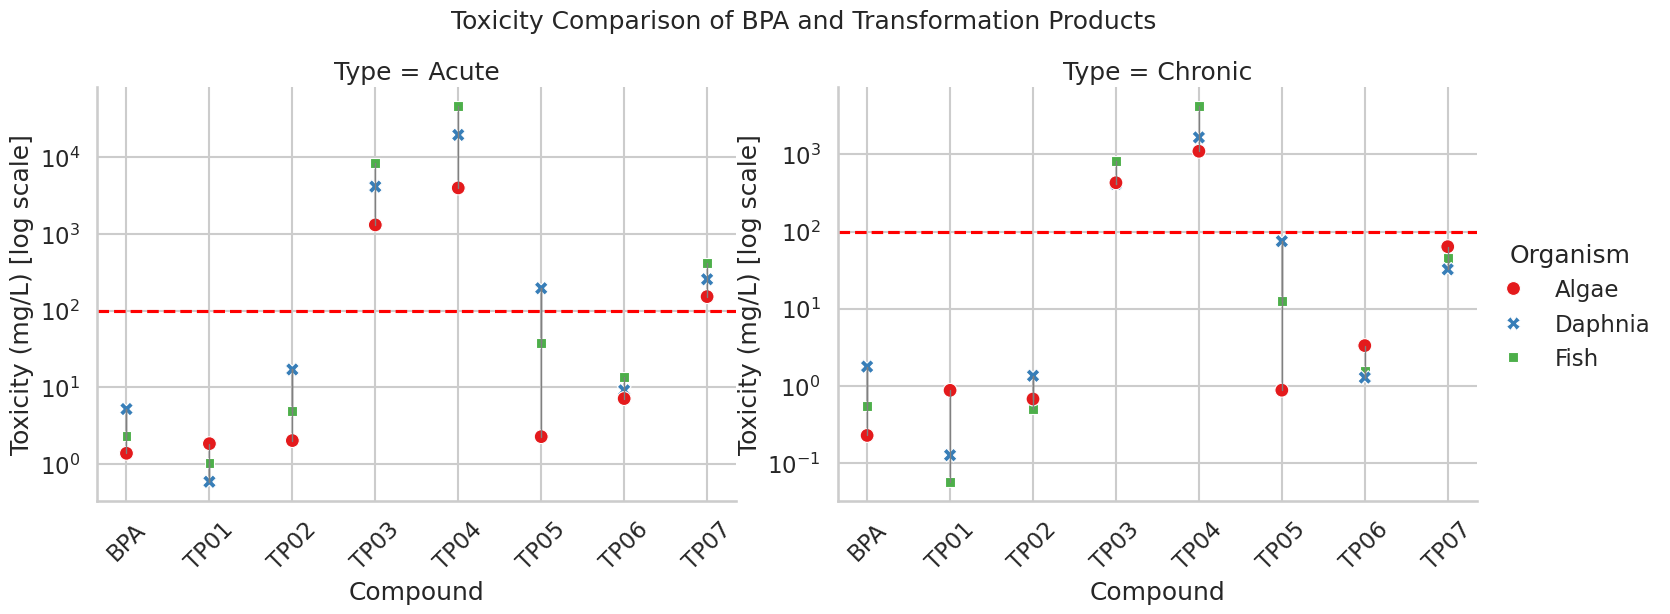

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Enable clean plot style
sns.set(style="whitegrid", context="talk", font="Times New Roman")

# Define your raw data
data = {
    "Compound": ["BPA", "TP01", "TP02", "TP03", "TP04", "TP05", "TP06", "TP07"],
    "Fish_Acute": [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    "Daphnia_Acute": [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    "Algae_Acute": [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    "Fish_Chronic": [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    "Daphnia_Chronic": [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    "Algae_Chronic": [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Melt to long format
df_melted = pd.melt(df, id_vars="Compound", var_name="ToxType", value_name="Toxicity")

# Split "ToxType" into Organism and Type
df_melted["Type"] = df_melted["ToxType"].apply(lambda x: "Acute" if "Acute" in x else "Chronic")
df_melted["Organism"] = df_melted["ToxType"].apply(lambda x: "Fish" if "Fish" in x else ("Daphnia" if "Daphnia" in x else "Algae"))

# Ensure correct order
df_melted["Compound"] = pd.Categorical(df_melted["Compound"], categories=["BPA", "TP01", "TP02", "TP03", "TP04", "TP05", "TP06", "TP07"], ordered=True)
df_melted["Organism"] = pd.Categorical(df_melted["Organism"], categories=["Algae", "Daphnia", "Fish"], ordered=True)

# Create numeric x positions for compound (for ladder lines)
df_melted["xpos"] = df_melted["Compound"].cat.codes + 1

# Plot
g = sns.FacetGrid(df_melted, col="Type", sharey=False, height=6, aspect=1.3)

# Add points
g.map_dataframe(sns.scatterplot, x="xpos", y="Toxicity", hue="Organism", style="Organism", s=100, palette="Set1")

# Add ladder lines
for ax, (typ, subdata) in zip(g.axes.flat, df_melted.groupby("Type")):
    for comp in subdata["Compound"].unique():
        temp = subdata[subdata["Compound"] == comp]
        ax.plot([temp["xpos"].iloc[0]] * 3, temp.sort_values("Organism")["Toxicity"], color="gray", linewidth=1)

# Customize plot
for ax in g.axes.flat:
    ax.set_yscale("log")
    ax.set_xlabel("Compound")
    ax.set_xticks(range(1, 9))
    ax.set_xticklabels(["BPA", "TP01", "TP02", "TP03", "TP04", "TP05", "TP06", "TP07"], rotation=45)
    ax.axhline(100, linestyle='--', color='red')  # threshold line
    ax.set_ylabel("Toxicity (mg/L) [log scale]")

# Adjust legend and title
g.add_legend(title="Organism")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Toxicity Comparison of BPA and Transformation Products", fontsize=18)

plt.show()


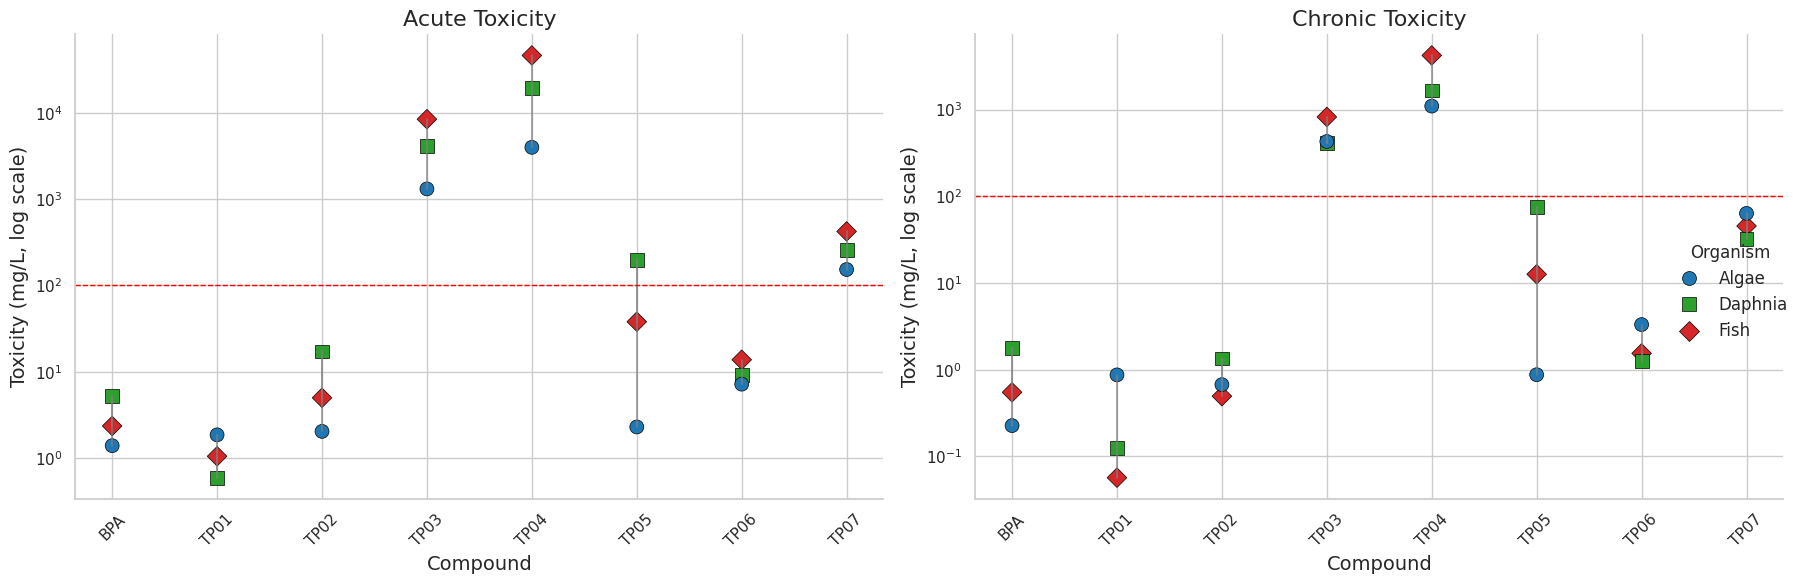

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style and font
sns.set(style="whitegrid", context="notebook", font="Times New Roman", rc={"axes.titlesize":18, "axes.labelsize":16})

# Toxicity data
data = {
    "Compound": ["BPA", "TP01", "TP02", "TP03", "TP04", "TP05", "TP06", "TP07"],
    "Fish_Acute": [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    "Daphnia_Acute": [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    "Algae_Acute": [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    "Fish_Chronic": [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    "Daphnia_Chronic": [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    "Algae_Chronic": [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}

df = pd.DataFrame(data)

# Reshape data
df_melted = pd.melt(df, id_vars="Compound", var_name="ToxType", value_name="Toxicity")
df_melted["Type"] = df_melted["ToxType"].apply(lambda x: "Acute" if "Acute" in x else "Chronic")
df_melted["Organism"] = df_melted["ToxType"].apply(lambda x: "Fish" if "Fish" in x else ("Daphnia" if "Daphnia" in x else "Algae"))

# Set plotting order
compound_order = ["BPA", "TP01", "TP02", "TP03", "TP04", "TP05", "TP06", "TP07"]
organism_order = ["Algae", "Daphnia", "Fish"]

df_melted["Compound"] = pd.Categorical(df_melted["Compound"], categories=compound_order, ordered=True)
df_melted["Organism"] = pd.Categorical(df_melted["Organism"], categories=organism_order, ordered=True)
df_melted["xpos"] = df_melted["Compound"].cat.codes + 1

# Set color palette and marker styles
palette = {"Algae": "#1f77b4", "Daphnia": "#2ca02c", "Fish": "#d62728"}
markers = {"Algae": "o", "Daphnia": "s", "Fish": "D"}

# Create FacetGrid
g = sns.FacetGrid(df_melted, col="Type", sharey=False, height=6, aspect=1.4, despine=True)

# Plot data
g.map_dataframe(sns.scatterplot, x="xpos", y="Toxicity", hue="Organism", style="Organism",
                palette=palette, markers=markers, s=100, edgecolor="black", linewidth=0.5)

# Add ladder lines manually
for ax, (type_name, group_data) in zip(g.axes.flat, df_melted.groupby("Type")):
    for compound in compound_order:
        subset = group_data[group_data["Compound"] == compound].sort_values("Organism")
        if len(subset) == 3:
            ax.plot([subset["xpos"].iloc[0]] * 3, subset["Toxicity"], color='gray', linewidth=1.2, alpha=0.8)

# Customize axes
for ax in g.axes.flat:
    ax.set_yscale("log")
    ax.set_xticks(range(1, len(compound_order)+1))
    ax.set_xticklabels(compound_order, rotation=45)
    ax.axhline(100, linestyle='--', color='red', linewidth=1)
    ax.set_ylabel("Toxicity (mg/L, log scale)", fontsize=14)
    ax.set_xlabel("Compound", fontsize=14)

# Titles and legend
g.set_titles("{col_name} Toxicity", size=16)
g.add_legend(title="Organism", label_order=organism_order, fontsize=12, title_fontsize=13)

# Save high-resolution PNG
plt.tight_layout()
plt.savefig("toxicity_ladder_plot.png", dpi=300, bbox_inches='tight')

plt.show()


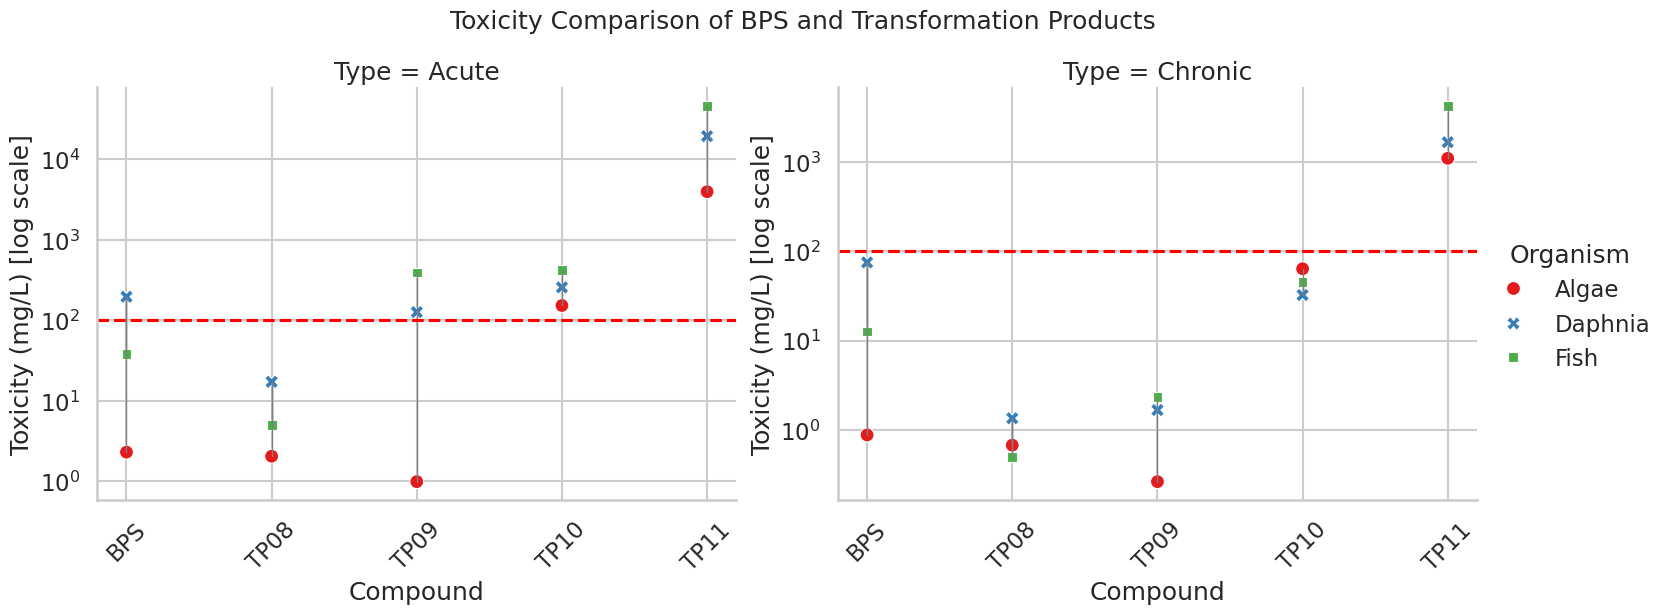

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid", context="talk", font="Times New Roman")

# Step 1: Define the new dataset
data2 = {
    "Compound": ["BPS", "TP08", "TP09", "TP10", "TP11"],
    "Fish_Acute": [37.918, 4.988, 393.685, 421.723, 46104.613],
    "Daphnia_Acute": [196.258, 17.161, 126.297, 256.768, 19499.523],
    "Algae_Acute": [2.289, 2.035, 0.983, 152.688, 3975.998],
    "Fish_Chronic": [12.641, 0.496, 2.327, 45.491, 4216.204],
    "Daphnia_Chronic": [74.993, 1.348, 1.666, 32.318, 1660.936],
    "Algae_Chronic": [0.877, 0.674, 0.263, 63.617, 1098.424]
}

# Step 2: Convert to DataFrame
df2 = pd.DataFrame(data2)

# Step 3: Melt into long format
df2_melted = pd.melt(df2, id_vars="Compound", var_name="ToxType", value_name="Toxicity")

# Step 4: Add columns for type and organism
df2_melted["Type"] = df2_melted["ToxType"].apply(lambda x: "Acute" if "Acute" in x else "Chronic")
df2_melted["Organism"] = df2_melted["ToxType"].apply(
    lambda x: "Fish" if "Fish" in x else ("Daphnia" if "Daphnia" in x else "Algae")
)

# Step 5: Order compounds and organisms
df2_melted["Compound"] = pd.Categorical(df2_melted["Compound"],
                                        categories=["BPS", "TP08", "TP09", "TP10", "TP11"],
                                        ordered=True)
df2_melted["Organism"] = pd.Categorical(df2_melted["Organism"],
                                        categories=["Algae", "Daphnia", "Fish"],
                                        ordered=True)

# Step 6: Numeric position for compounds
df2_melted["xpos"] = df2_melted["Compound"].cat.codes + 1

# Step 7: Create plot
g = sns.FacetGrid(df2_melted, col="Type", sharey=False, height=6, aspect=1.3)

# Add points
g.map_dataframe(sns.scatterplot, x="xpos", y="Toxicity", hue="Organism", style="Organism", s=100, palette="Set1")

# Add ladder lines
for ax, (typ, subdata) in zip(g.axes.flat, df2_melted.groupby("Type")):
    for comp in subdata["Compound"].unique():
        temp = subdata[subdata["Compound"] == comp]
        ax.plot([temp["xpos"].iloc[0]] * 3,
                temp.sort_values("Organism")["Toxicity"],
                color="gray", linewidth=1)

# Customize axes
for ax in g.axes.flat:
    ax.set_yscale("log")
    ax.set_xlabel("Compound")
    ax.set_xticks(range(1, 6))
    ax.set_xticklabels(["BPS", "TP08", "TP09", "TP10", "TP11"], rotation=45)
    ax.axhline(100, linestyle='--', color='red')  # threshold line
    ax.set_ylabel("Toxicity (mg/L) [log scale]")

# Final adjustments
g.add_legend(title="Organism")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Toxicity Comparison of BPS and Transformation Products", fontsize=18)

plt.show()


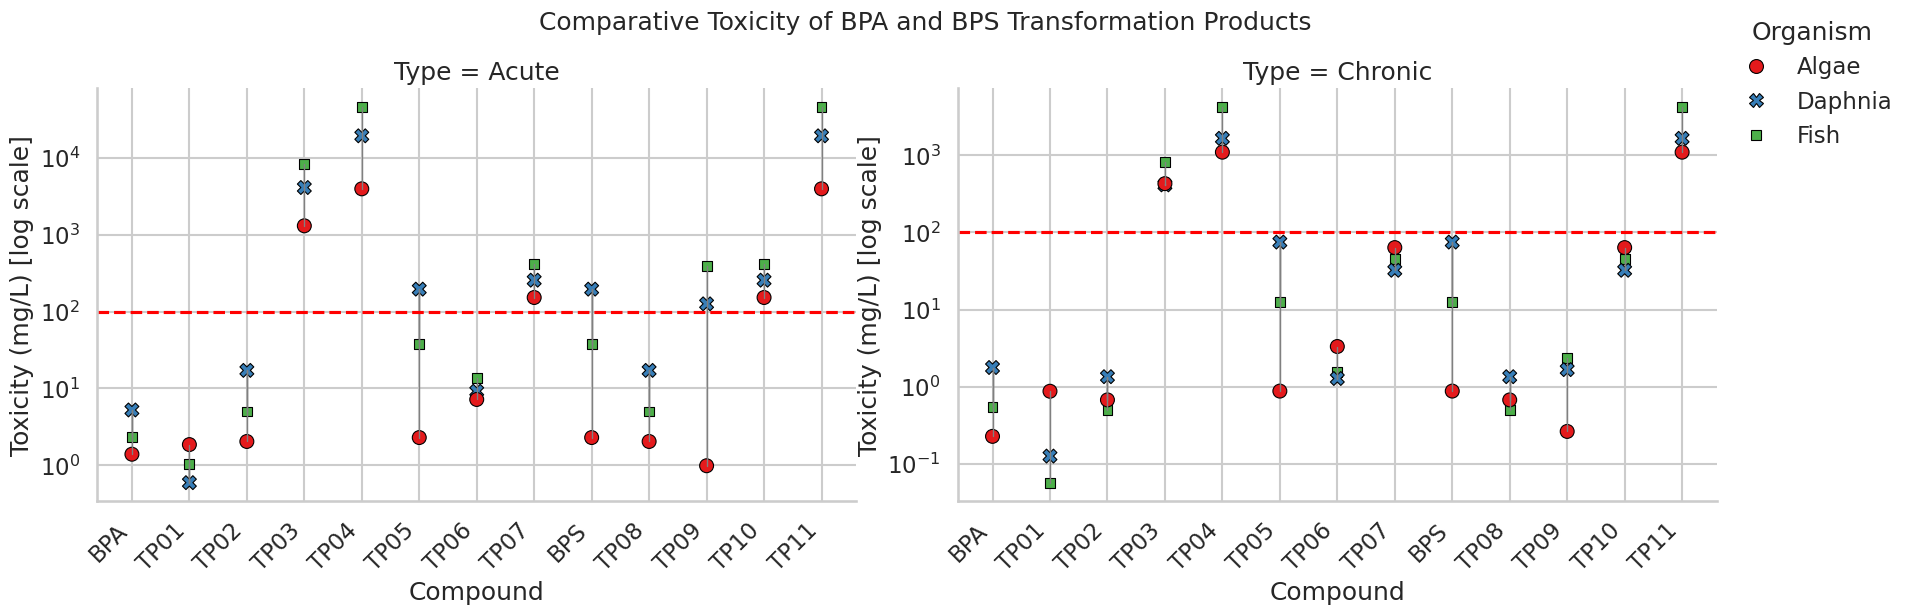

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid", context="talk", font="Times New Roman")

# ---- Step 1: BPA Data ----
data1 = {
    "Compound": ["BPA", "TP01", "TP02", "TP03", "TP04", "TP05", "TP06", "TP07"],
    "Fish_Acute": [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    "Daphnia_Acute": [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    "Algae_Acute": [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    "Fish_Chronic": [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    "Daphnia_Chronic": [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    "Algae_Chronic": [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}
df1 = pd.DataFrame(data1)
df1["Group"] = "BPA"

# ---- Step 2: BPS Data ----
data2 = {
    "Compound": ["BPS", "TP08", "TP09", "TP10", "TP11"],
    "Fish_Acute": [37.918, 4.988, 393.685, 421.723, 46104.613],
    "Daphnia_Acute": [196.258, 17.161, 126.297, 256.768, 19499.523],
    "Algae_Acute": [2.289, 2.035, 0.983, 152.688, 3975.998],
    "Fish_Chronic": [12.641, 0.496, 2.327, 45.491, 4216.204],
    "Daphnia_Chronic": [74.993, 1.348, 1.666, 32.318, 1660.936],
    "Algae_Chronic": [0.877, 0.674, 0.263, 63.617, 1098.424]
}
df2 = pd.DataFrame(data2)
df2["Group"] = "BPS"

# ---- Step 3: Merge and Melt ----
df_all = pd.concat([df1, df2], ignore_index=True)

df_melted = pd.melt(df_all, id_vars=["Compound", "Group"], var_name="ToxType", value_name="Toxicity")
df_melted["Type"] = df_melted["ToxType"].apply(lambda x: "Acute" if "Acute" in x else "Chronic")
df_melted["Organism"] = df_melted["ToxType"].apply(
    lambda x: "Fish" if "Fish" in x else ("Daphnia" if "Daphnia" in x else "Algae")
)

# Compound ordering
compound_order = ["BPA", "TP01", "TP02", "TP03", "TP04", "TP05", "TP06", "TP07",
                  "BPS", "TP08", "TP09", "TP10", "TP11"]
df_melted["Compound"] = pd.Categorical(df_melted["Compound"], categories=compound_order, ordered=True)
df_melted["Organism"] = pd.Categorical(df_melted["Organism"], categories=["Algae", "Daphnia", "Fish"], ordered=True)
df_melted["xpos"] = df_melted["Compound"].cat.codes + 1

# ---- Step 4: Plot ----
g = sns.FacetGrid(df_melted, col="Type", sharey=False, height=6, aspect=1.5)

# Scatter points
g.map_dataframe(sns.scatterplot, x="xpos", y="Toxicity", hue="Organism", style="Organism",
                s=100, palette="Set1", edgecolor="black")

# Ladder lines per compound
for ax, (typ, subdata) in zip(g.axes.flat, df_melted.groupby("Type")):
    for comp in subdata["Compound"].unique():
        temp = subdata[subdata["Compound"] == comp]
        ax.plot([temp["xpos"].iloc[0]] * 3,
                temp.sort_values("Organism")["Toxicity"],
                color="gray", linewidth=1)

# Customize axes
compound_labels = ["BPA", "TP01", "TP02", "TP03", "TP04", "TP05", "TP06", "TP07",
                   "BPS", "TP08", "TP09", "TP10", "TP11"]

for ax in g.axes.flat:
    ax.set_yscale("log")
    ax.set_xlabel("Compound")
    ax.set_xticks(range(1, len(compound_order) + 1))
    ax.set_xticklabels(compound_labels, rotation=45, ha='right')
    ax.axhline(100, linestyle='--', color='red')  # threshold
    ax.set_ylabel("Toxicity (mg/L) [log scale]")

# Title and legend
g.add_legend(title="Organism", loc='upper right')
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Comparative Toxicity of BPA and BPS Transformation Products", fontsize=18)

plt.show()


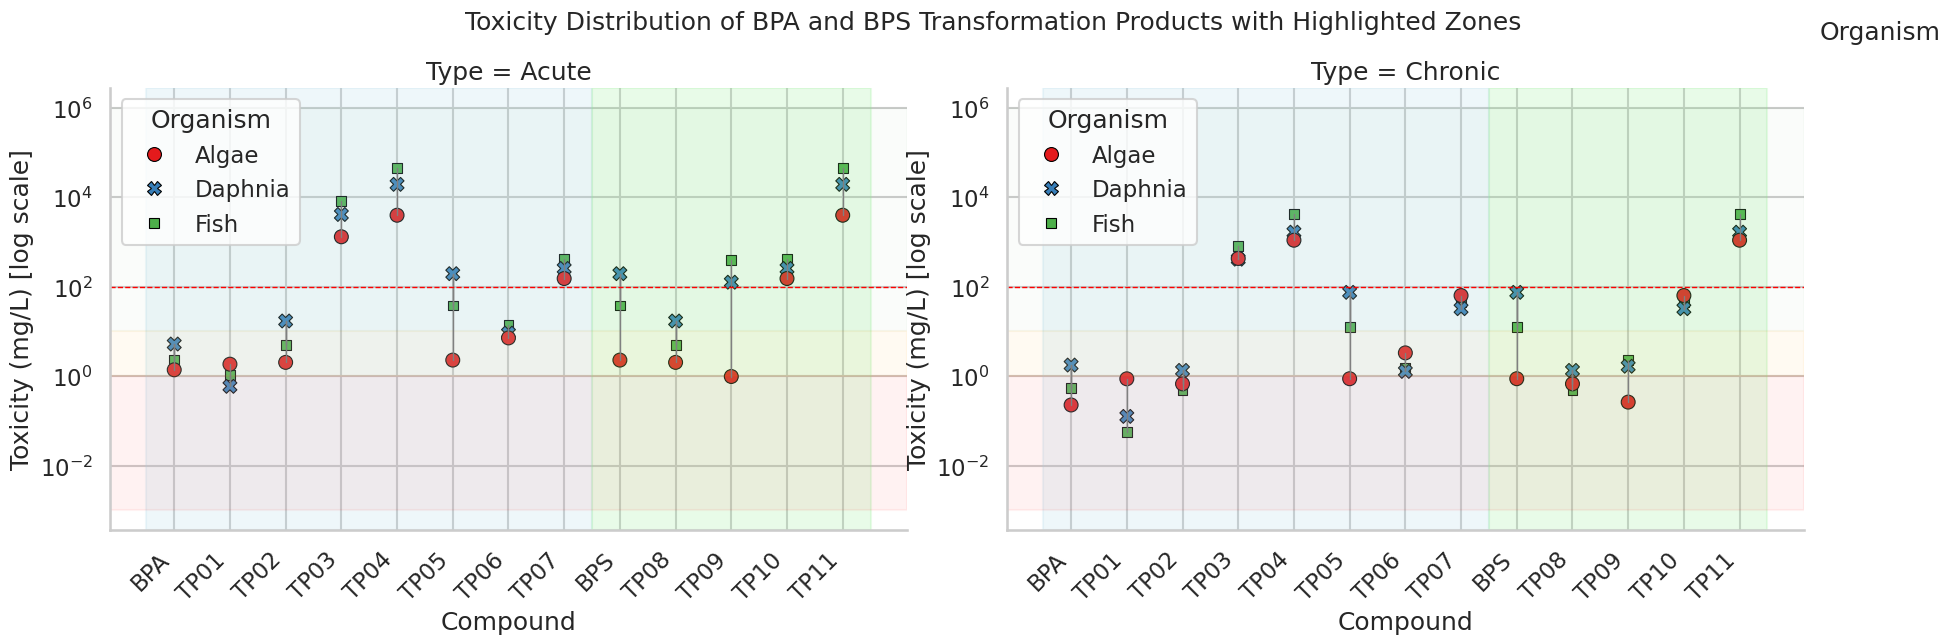

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setup
sns.set(style="whitegrid", context="talk", font="Times New Roman")

# ---- BPA Data ----
data1 = {
    "Compound": ["BPA", "TP01", "TP02", "TP03", "TP04", "TP05", "TP06", "TP07"],
    "Fish_Acute": [2.350, 1.047, 4.988, 8413.229, 46104.613, 37.918, 13.746, 421.723],
    "Daphnia_Acute": [5.237, 0.592, 17.161, 4135.310, 19499.523, 196.258, 9.184, 256.768],
    "Algae_Acute": [1.389, 1.854, 2.035, 1311.176, 3975.998, 2.289, 7.174, 152.688],
    "Fish_Chronic": [0.550, 0.057, 0.496, 823.613, 4216.204, 12.641, 1.547, 45.491],
    "Daphnia_Chronic": [1.773, 0.126, 1.348, 413.789, 1660.936, 74.993, 1.277, 32.318],
    "Algae_Chronic": [0.227, 0.873, 0.674, 429.128, 1098.424, 0.877, 3.319, 63.617]
}
df1 = pd.DataFrame(data1)
df1["Group"] = "BPA"

# ---- BPS Data ----
data2 = {
    "Compound": ["BPS", "TP08", "TP09", "TP10", "TP11"],
    "Fish_Acute": [37.918, 4.988, 393.685, 421.723, 46104.613],
    "Daphnia_Acute": [196.258, 17.161, 126.297, 256.768, 19499.523],
    "Algae_Acute": [2.289, 2.035, 0.983, 152.688, 3975.998],
    "Fish_Chronic": [12.641, 0.496, 2.327, 45.491, 4216.204],
    "Daphnia_Chronic": [74.993, 1.348, 1.666, 32.318, 1660.936],
    "Algae_Chronic": [0.877, 0.674, 0.263, 63.617, 1098.424]
}
df2 = pd.DataFrame(data2)
df2["Group"] = "BPS"

# ---- Combine and Reshape ----
df_all = pd.concat([df1, df2], ignore_index=True)
df_melted = pd.melt(df_all, id_vars=["Compound", "Group"], var_name="ToxType", value_name="Toxicity")
df_melted["Type"] = df_melted["ToxType"].apply(lambda x: "Acute" if "Acute" in x else "Chronic")
df_melted["Organism"] = df_melted["ToxType"].apply(
    lambda x: "Fish" if "Fish" in x else ("Daphnia" if "Daphnia" in x else "Algae")
)

# Order compounds
compound_order = ["BPA", "TP01", "TP02", "TP03", "TP04", "TP05", "TP06", "TP07",
                  "BPS", "TP08", "TP09", "TP10", "TP11"]
df_melted["Compound"] = pd.Categorical(df_melted["Compound"], categories=compound_order, ordered=True)
df_melted["xpos"] = df_melted["Compound"].cat.codes + 1
df_melted["Organism"] = pd.Categorical(df_melted["Organism"], categories=["Algae", "Daphnia", "Fish"], ordered=True)

# ---- Plot ----
g = sns.FacetGrid(df_melted, col="Type", sharey=False, height=6, aspect=1.5)

def add_shading(ax, xsplit=8.5):
    ax.axvspan(0.5, xsplit, color="lightblue", alpha=0.2, label="BPA group")
    ax.axvspan(xsplit, 13.5, color="lightgreen", alpha=0.2, label="BPS group")
    # Horizontal zones
    ax.axhspan(0.001, 1, color='red', alpha=0.05, label='High toxicity (≤1 mg/L)')
    ax.axhspan(1, 10, color='orange', alpha=0.05, label='Moderate (1–10 mg/L)')
    ax.axhspan(10, 1e6, color='green', alpha=0.02, label='Low (>10 mg/L)')
    ax.axhline(100, linestyle='--', color='red', linewidth=1)

# Draw points and ladder
for ax, (typ, subdata) in zip(g.axes.flat, df_melted.groupby("Type")):
    sns.scatterplot(data=subdata, x="xpos", y="Toxicity", hue="Organism", style="Organism",
                    s=100, ax=ax, palette="Set1", edgecolor="black")

    for comp in subdata["Compound"].unique():
        temp = subdata[subdata["Compound"] == comp]
        ax.plot([temp["xpos"].iloc[0]] * 3,
                temp.sort_values("Organism")["Toxicity"],
                color="gray", linewidth=1)

    add_shading(ax)
    ax.set_yscale("log")
    ax.set_xticks(range(1, len(compound_order)+1))
    ax.set_xticklabels(compound_order, rotation=45, ha='right')
    ax.set_xlabel("Compound")
    ax.set_ylabel("Toxicity (mg/L) [log scale]")

# Final touches
g.add_legend(title="Organism", loc="upper right")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Toxicity Distribution of BPA and BPS Transformation Products with Highlighted Zones", fontsize=18)

plt.show()
